####**Бизнес-постановка задачи:**
Реализовать предсказатель цен на золото на основе исторических данных, включая данные о фондовых индексах (S&P, Dow Jones), объёмах торгов и других экономических индикаторах.

####**Постановка ML-задачи:**
Задача временного ряда, где целевая переменная — это цена закрытия золота на следующий день. Используется регрессия для прогнозирования будущих цен.

####**Набор данных:**
Данные содержат 1718 строк и 81 колонку, включая цены открытия, максимальные и минимальные значения, объёмы торгов, и индексы, такие как S&P и Dow Jones. По условиям, нам надо порядка 10 столбцов и 1000 строк, поэтому все условия соблюдены (данные не в виде рисунков)

#**Выбор и обоснование метрики для измерения качества:**

Для задачи регрессии считаю подходящей метрикой среднеквадратическую ошибку (MSE), так как она чувствительна к крупным отклонениям и позволяет оценить качество модели в контексте временных рядов. Корректное предсказание мелких изменений в ценах золота может оказаться критически важным.

**Метрики:**

*   *Среднеквадратическая ошибка (MSE)* - будет использоваться для оценки модели.
*   *Корреляция Пирсона* - дополнительная метрика для оценки линейной зависимости предсказанных и реальных значений.

Теперь необходимо провести дальнейший разведочный анализ данных (EDA) для выявления взаимосвязей и возможных проблем в наборе данных:

### Exploratory Data Analysis Summary ###

Total Missing Values in Dataset: 0

Descriptive Statistics (for key columns):

          Open     High      Low    Close       Volume
count  1718.00  1718.00  1718.00  1718.00      1718.00
mean    127.32   127.85   126.78   127.32   8446327.12
std      17.53    17.63    17.40    17.54   4920730.72
min     100.92   100.99   100.23   100.50   1501600.00
25%     116.22   116.54   115.74   116.05   5412925.00
50%     121.92   122.33   121.37   121.80   7483900.00
75%     128.43   129.09   127.84   128.47  10207950.00
max     173.20   174.07   172.92   173.61  93804200.00

### Visualization: Distribution of Gold Close Prices ###


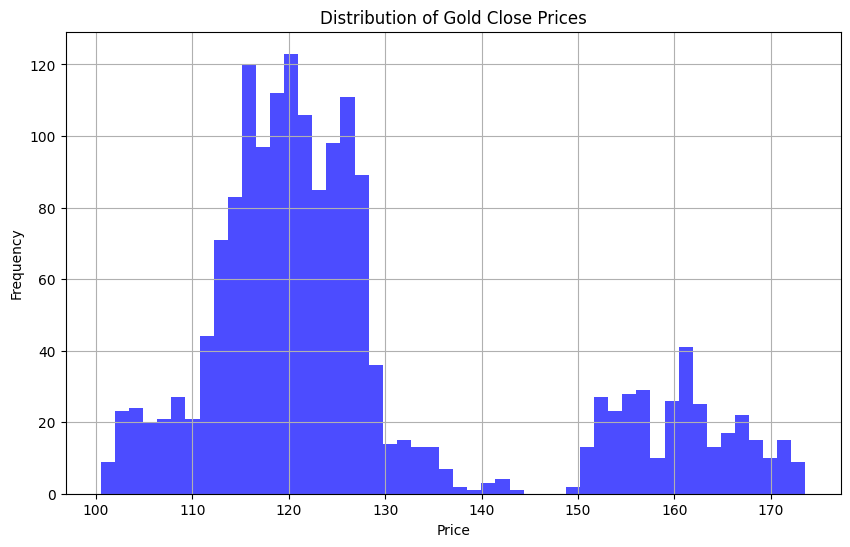

In [ ]:
file_path = '/content/Золото.csv'
data = pd.read_csv(file_path)

# Проверка пропущенных значений
missing_values = data.isnull().sum().sum()

# Описательная статистика
descriptive_stats = data.describe()

# Отображение результата
import matplotlib.pyplot as plt

def display_eda_summary(missing_values, descriptive_stats):
    print("### Exploratory Data Analysis Summary ###\n")
    print(f"Total Missing Values in Dataset: {missing_values}\n")

    print("Descriptive Statistics (for key columns):\n")
    print(descriptive_stats[['Open', 'High', 'Low', 'Close', 'Volume']].round(2))

    print("\n### Visualization: Distribution of Gold Close Prices ###")
    plt.figure(figsize=(10, 6))
    plt.hist(data['Close'], bins=50, color='blue', alpha=0.7)
    plt.title('Distribution of Gold Close Prices')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Сводка
display_eda_summary(missing_values, descriptive_stats)

#**Предварительный разведочный анализ данных (EDA):**

*   *Количество пропущенных значений:* В данных отсутствуют пропущенные значения, что означает, что дальнейшая очистка данных от пропусков не требуется.
*   *Основные статистики:* Данные включают цены открытия, закрытия, максимальные и минимальные значения по разным активам, а также объемы торгов и дополнительные экономические индикаторы. Средние значения, стандартные отклонения, минимальные и максимальные значения уже дают представление о распределении этих характеристик.
*   *Распределение целевой переменной (цена закрытия золота):* График распределения цены закрытия показывает наличие умеренной вариации в данных, что подтверждается минимальными и максимальными значениями от 100 до 173 долларов.

#**Что буду делать дальше:**
1.   Построение временных рядов для выявления трендов и сезонности.
2.   Выбор значимых признаков для построения модели регрессии.

